In [2]:
import os
import zipfile

In [3]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (15, 10)
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
SEED = 42

ROOT = ""
zip_file = "covid19_1.zip"
covid19_csv = "covid-19cases.csv"

In [6]:
# Разархивируем данные 

In [7]:
with zipfile.ZipFile(os.path.join(ROOT, zip_file), 'r') as zip_ref:
    zip_ref.extractall(ROOT)

In [22]:
data_df = pd.read_csv(os.path.join(ROOT, covid19_csv), index_col=0)
data_df

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 40,Unnamed: 41,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
1,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
3,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105743,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105744,26-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0
105745,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105746,27-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0


In [23]:
data = data_df.copy()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105748 entries, 0 to 105747
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   date                             105748 non-null  object 
 1   continent                        52269 non-null   object 
 2   location                         52873 non-null   object 
 3   total_cases                      49259 non-null   float64
 4   new_cases                        51979 non-null   float64
 5   new_cases_smoothed               51185 non-null   float64
 6   total_deaths                     40323 non-null   float64
 7   new_deaths                       51979 non-null   float64
 8   new_deaths_smoothed              51185 non-null   float64
 9   total_cases_per_million          48993 non-null   float64
 10  new_cases_per_million            51915 non-null   float64
 11  new_cases_smoothed_per_million   51120 non-null   float64
 12  to

In [10]:
columns = data.columns.values
columns

array(['date', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units',
       'stringency_index', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'Unnamed: 40', 'Unnamed: 41',
       'iso_code', 'month', 'year'], dty

In [11]:
import missingno as msno

<AxesSubplot:>

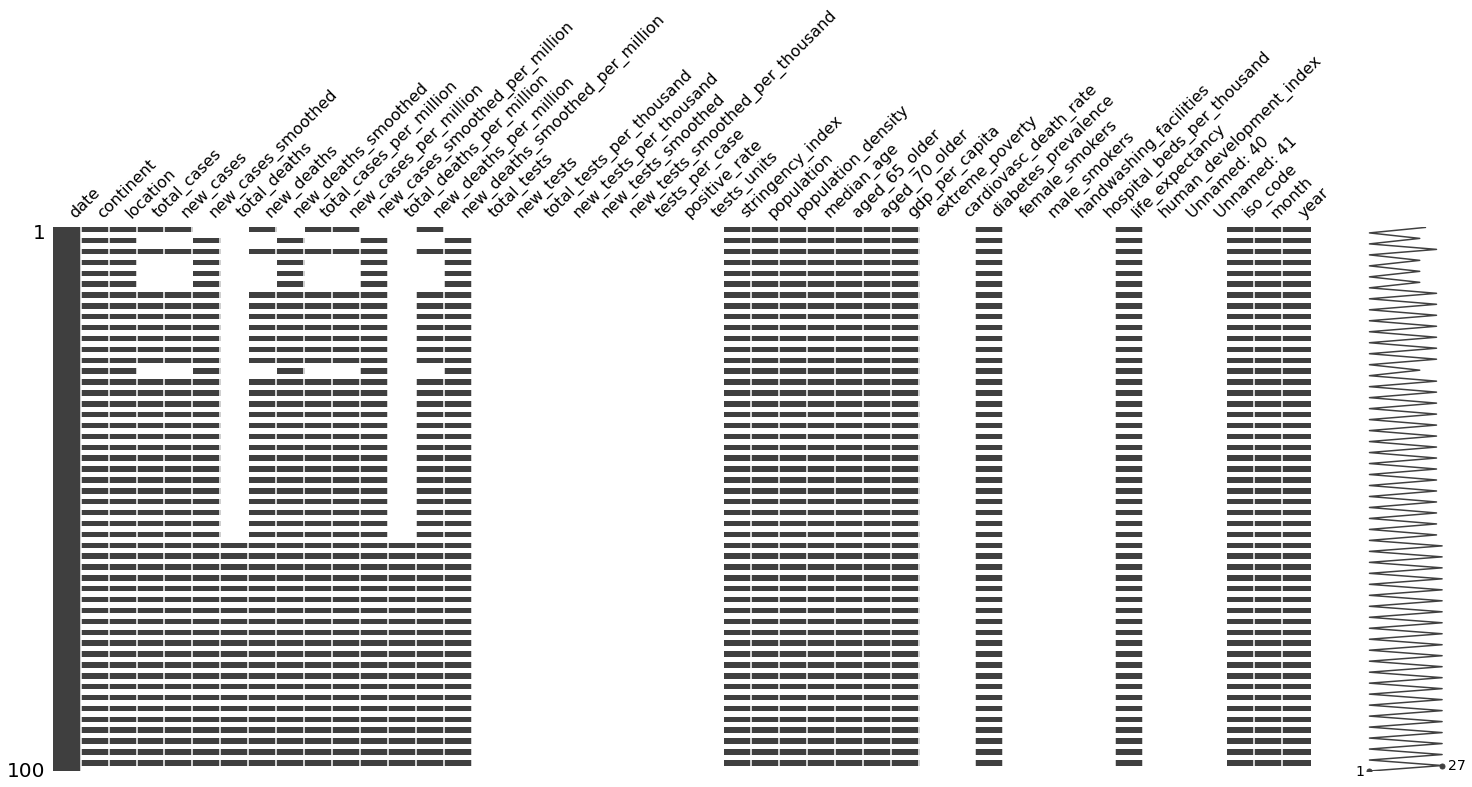

In [13]:
msno.matrix(data.head(100))

In [43]:
data["continent"].value_counts()

Europe           13748
Asia             12548
Africa           12482
North America     8360
South America     3133
Oceania           1998
Name: continent, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105748 entries, 0 to 105747
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   date                             105748 non-null  object 
 1   continent                        52269 non-null   object 
 2   location                         52873 non-null   object 
 3   total_cases                      49259 non-null   float64
 4   new_cases                        51979 non-null   float64
 5   new_cases_smoothed               51185 non-null   float64
 6   total_deaths                     40323 non-null   float64
 7   new_deaths                       51979 non-null   float64
 8   new_deaths_smoothed              51185 non-null   float64
 9   total_cases_per_million          48993 non-null   float64
 10  new_cases_per_million            51915 non-null   float64
 11  new_cases_smoothed_per_million   51120 non-null   float64
 12  to

In [46]:
data["year"].value_counts()

20.0    52805
19.0       68
Name: year, dtype: int64

In [47]:
data["month"].value_counts()

8.0     6542
7.0     6542
5.0     6527
9.0     6360
6.0     6331
4.0     6190
10.0    5733
3.0     4375
1.0     2111
2.0     2094
12.0      68
Name: month, dtype: int64

In [ ]:
# избавимся от невалидных строк "for Notes"

In [30]:
data = data[data["date"] != 'For Notes: ']

In [31]:
data

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 40,Unnamed: 41,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105738,23-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0
105740,24-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0
105742,25-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0
105744,26-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0


<AxesSubplot:>

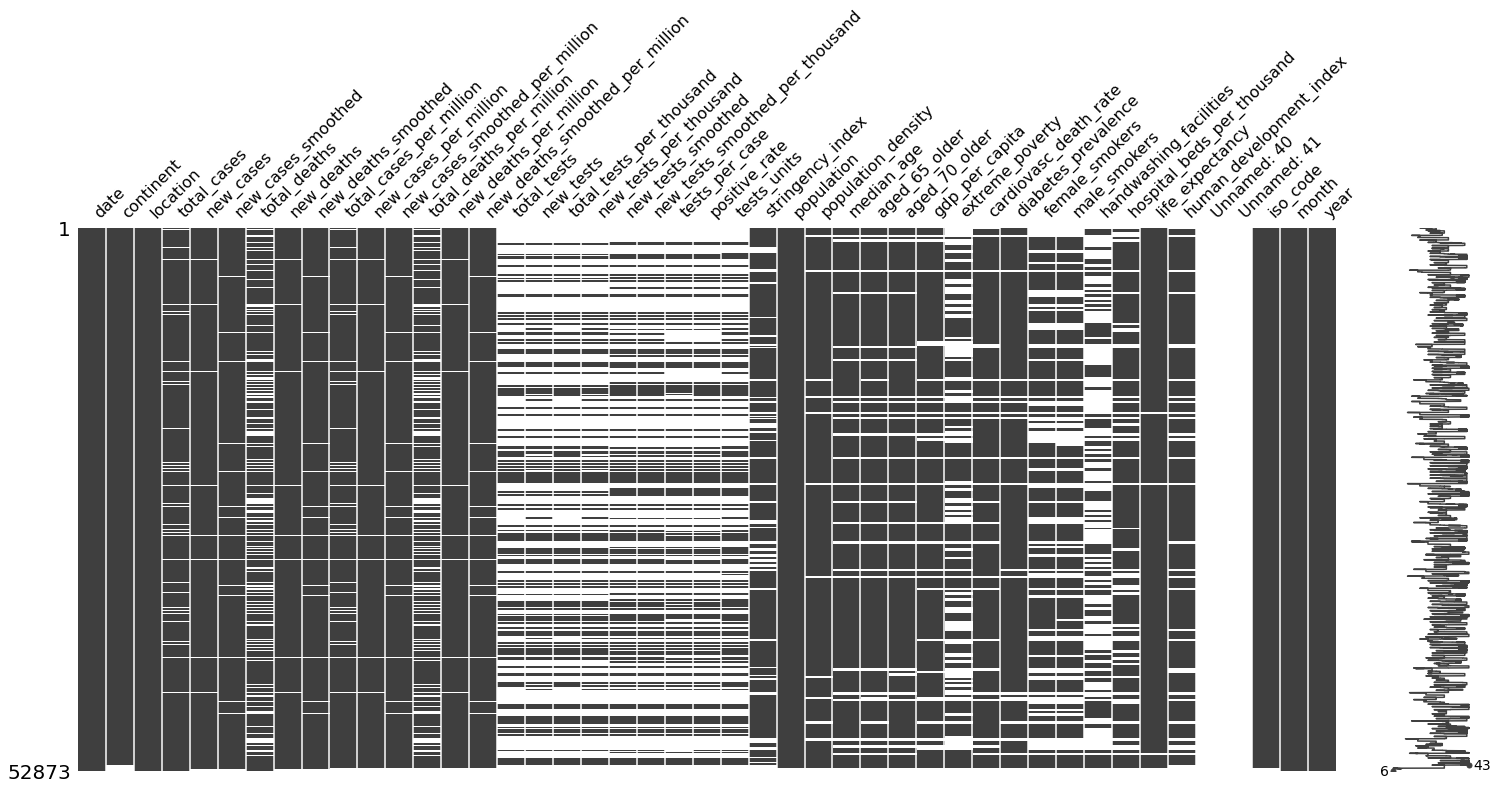

In [32]:
msno.matrix(data)

In [34]:
# удалилим 2 пустых стобца
data.drop(columns=['Unnamed: 40', 'Unnamed: 41'], inplace=True)
data

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105738,23-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0
105740,24-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0
105742,25-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0
105744,26-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0


<AxesSubplot:>

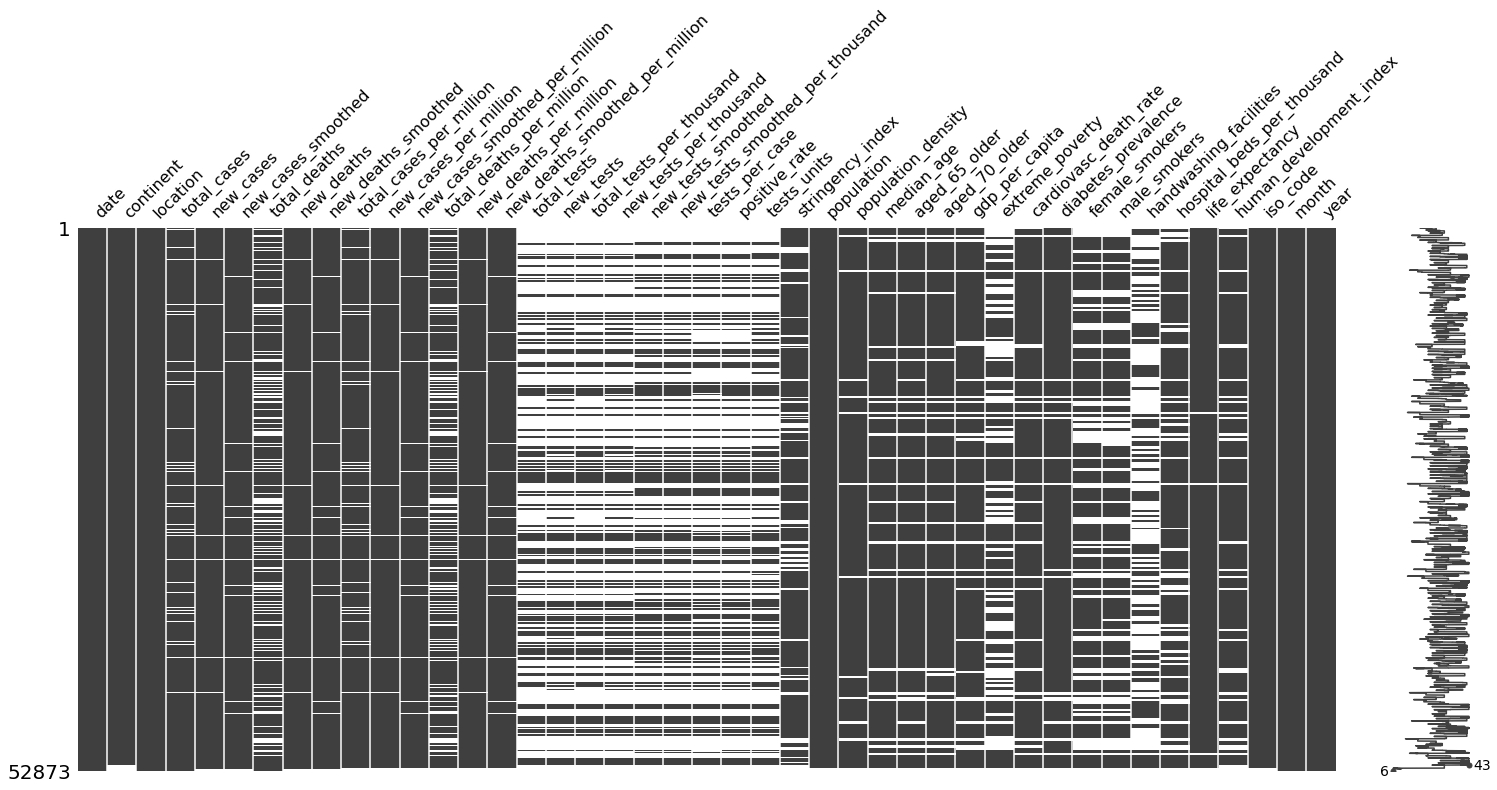

In [35]:
msno.matrix(data)

In [ ]:
# как видно на рисунке выше, есть NaN среди continents ... исправим это

In [63]:
data = data[~data["continent"].isna()]

<AxesSubplot:>

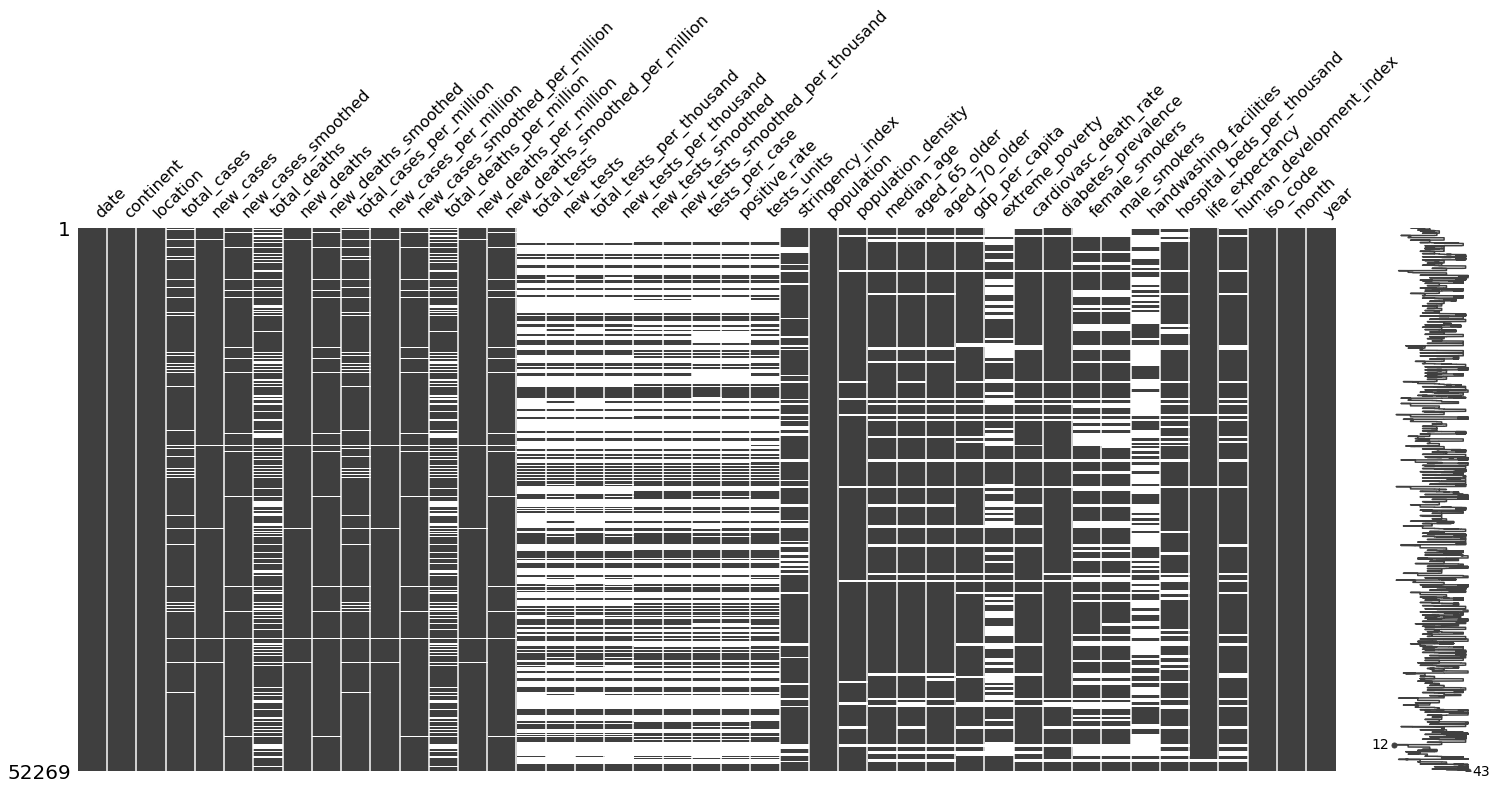

In [64]:
msno.matrix(data)

In [72]:
data["month"].unique()

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12.,  1.,  2.])

In [73]:
data["year"].unique()

array([20., 19.])

In [83]:
# Посмотрим на конретный примеры для большего понимая

In [81]:
data_aruba = data[(data["continent"] == "North America") & (data["location"] == "Aruba")]
data_aruba

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.000,37.465,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,23-10-20,North America,Aruba,4389.0,20.0,14.857,36.0,1.0,0.571,41108.593,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,10.0,20.0
440,24-10-20,North America,Aruba,4401.0,12.0,16.000,36.0,0.0,0.571,41220.988,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,10.0,20.0
442,25-10-20,North America,Aruba,4410.0,9.0,15.143,36.0,0.0,0.286,41305.284,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,10.0,20.0
444,26-10-20,North America,Aruba,4420.0,10.0,14.000,36.0,0.0,0.286,41398.947,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,10.0,20.0


<AxesSubplot:>

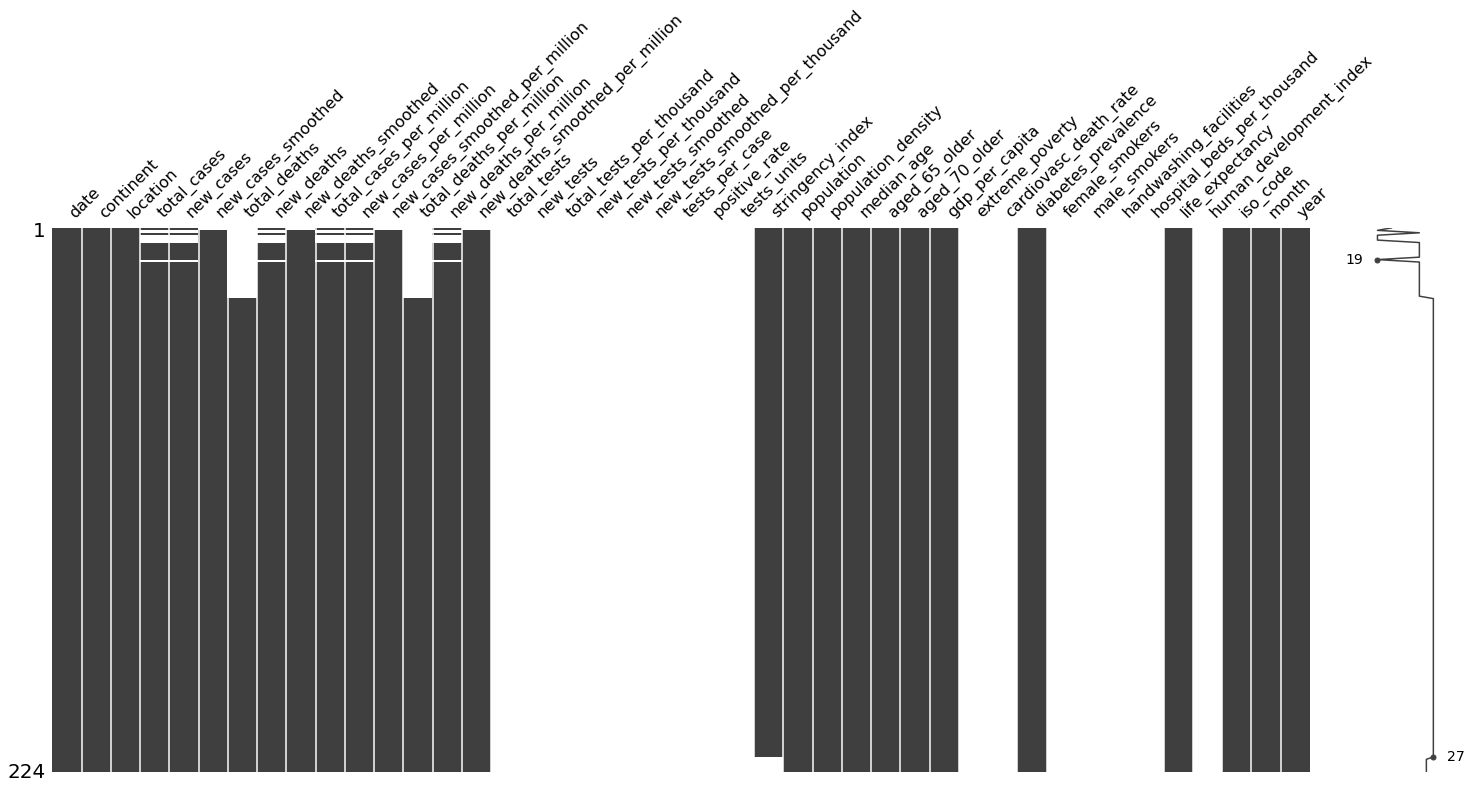

In [82]:
msno.matrix(data_aruba)

In [84]:
data_aruba.head(30)

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.000,37.465,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
10,23-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
12,24-03-20,North America,Aruba,12.0,8.0,1.429,NaN,0.0,0.000,112.395,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
14,25-03-20,North America,Aruba,17.0,5.0,2.143,NaN,0.0,0.000,159.227,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
16,26-03-20,North America,Aruba,19.0,2.0,2.429,NaN,0.0,0.000,177.959,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
18,27-03-20,North America,Aruba,28.0,9.0,3.429,NaN,0.0,0.000,262.256,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0


In [116]:
data_aruba.groupby(by=["location", "year", "month"]).agg({"new_cases": "sum", "total_cases": "max"})

new_cases  total_cases
location year month                        
Aruba    20.0 3.0         50.0         50.0
              4.0         50.0        100.0
              5.0          1.0        101.0
              6.0          2.0        103.0
              7.0         17.0        120.0
              8.0       1877.0       1997.0
              9.0       1937.0       3934.0
              10.0       486.0       4420.0

In [166]:
# сгруппируем данные по годам, месяцам
data_group = data.groupby(by=["continent", "year", "month"], as_index=False).agg({"new_cases": "sum"})
data_group

,continent,year,month,new_cases
0,Africa,19.0,12.0,0.0
1,Africa,20.0,1.0,0.0
2,Africa,20.0,2.0,3.0
3,Africa,20.0,3.0,5134.0
4,Africa,20.0,4.0,31598.0
...,...,...,...,...
61,South America,20.0,6.0,1336057.0
62,South America,20.0,7.0,1841061.0
63,South America,20.0,8.0,2206025.0
64,South America,20.0,9.0,1777702.0


In [171]:
data_group["year"] = data_group["year"].astype(int)
data_group["month"] = data_group["month"].astype(int)

In [172]:
data_group["date"] = data_group['month'].map(str)+ '-' +data_group['year'].map(str).apply(lambda x: "20"+x)
data_group

,continent,year,month,new_cases,date
0,Africa,19,12,0.0,12-2019
1,Africa,20,1,0.0,1-2020
2,Africa,20,2,3.0,2-2020
3,Africa,20,3,5134.0,3-2020
4,Africa,20,4,31598.0,4-2020
...,...,...,...,...,...
61,South America,20,6,1336057.0,6-2020
62,South America,20,7,1841061.0,7-2020
63,South America,20,8,2206025.0,8-2020
64,South America,20,9,1777702.0,9-2020


In [176]:
data_group["date"] = pd.to_datetime(data_group["date"], format='%m-%Y')
data_group

,continent,year,month,new_cases,date
0,Africa,19,12,0.0,2019-12-01
1,Africa,20,1,0.0,2020-01-01
2,Africa,20,2,3.0,2020-02-01
3,Africa,20,3,5134.0,2020-03-01
4,Africa,20,4,31598.0,2020-04-01
...,...,...,...,...,...
61,South America,20,6,1336057.0,2020-06-01
62,South America,20,7,1841061.0,2020-07-01
63,South America,20,8,2206025.0,2020-08-01
64,South America,20,9,1777702.0,2020-09-01


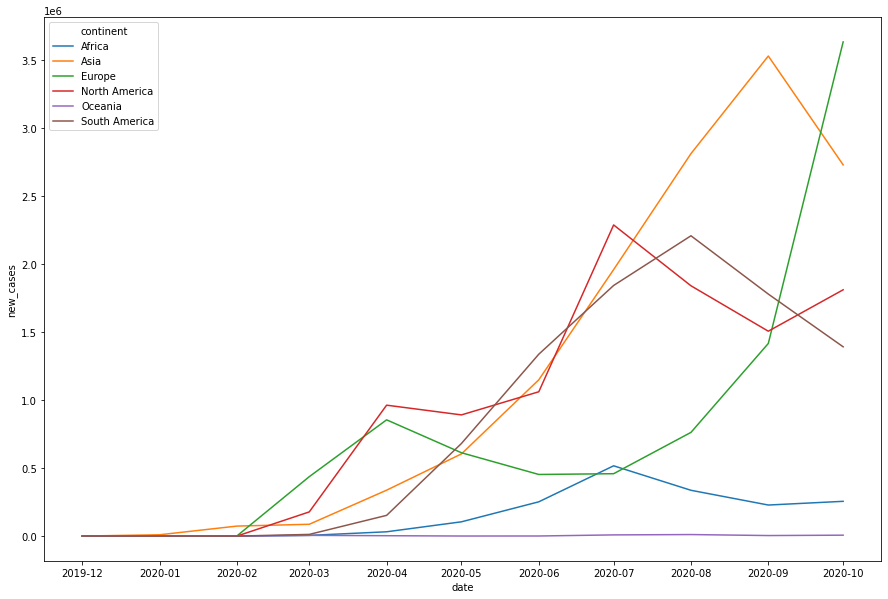

In [182]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=data_group, x="date", y="new_cases", hue="continent");

In [186]:
data["continent"].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [191]:
def create_df_continents(df, continents_names):
    continents = []
    for continent_name in continents_names:
        continent_df = df[df["continent"] == continent_name]
        continents.append(continent_df)
    return continents

In [195]:
continents = create_df_continents(data_group, data["continent"].unique())

In [196]:
north_america, asia, africa, europe, south_america, oceania = continents

In [249]:
continents_new_cases = pd.concat([continent_df.reset_index()[["new_cases"]] for continent_df in continents], axis=1)
continents_new_cases.set_axis(data["continent"].unique(), axis=1, inplace=True)
continents_new_cases

,North America,Asia,Africa,Europe,South America,Oceania
0,0.0,27.0,0.0,0.0,0.0,0.0
1,11.0,9766.0,0.0,15.0,0.0,7.0
2,85.0,73473.0,3.0,1136.0,1.0,19.0
3,177646.0,86771.0,5134.0,436523.0,12354.0,5298.0
4,961731.0,337267.0,31598.0,853972.0,152202.0,2812.0
5,890243.0,603767.0,104887.0,612160.0,680435.0,503.0
6,1060151.0,1148151.0,251822.0,452637.0,1336057.0,705.0
7,2285553.0,1957560.0,516291.0,458299.0,1841061.0,8750.0
8,1838698.0,2809542.0,336450.0,761803.0,2206025.0,11296.0
9,1505003.0,3526485.0,228136.0,1414993.0,1777702.0,3925.0


In [251]:
# посчитаем корредяционную матрицу

corr_matrix = continents_new_cases.corr()
corr_matrix

,North America,Asia,Africa,Europe,South America,Oceania
North America,1.000000,0.843803,0.928111,0.558752,0.913641,0.771493
Asia,0.843803,1.000000,0.758125,0.640130,0.915452,0.677354
Africa,0.928111,0.758125,1.000000,0.331377,0.919198,0.728086
Europe,0.558752,0.640130,0.331377,1.000000,0.430063,0.405641
South America,0.913641,0.915452,0.919198,0.430063,1.000000,0.724875
Oceania,0.771493,0.677354,0.728086,0.405641,0.724875,1.000000


In [252]:
corr_matrix["North America"]

North America    1.000000
Asia             0.843803
Africa           0.928111
Europe           0.558752
South America    0.913641
Oceania          0.771493
Name: North America, dtype: float64

In [ ]:
# попытка понять, вдруг из других столбцов мы сможем вытащить данные про новый случаи заражения

In [88]:
data_total_cases_nan = data[data["total_cases"].isna()]
data_total_cases_nan

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
10,23-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
26,31-03-20,North America,Aruba,NaN,NaN,5.429,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103174,03-03-20,Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.52,8.1,33.2,43.993,2.32,64.13,0.699,ZAF,3.0,20.0
103176,04-03-20,Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.52,8.1,33.2,43.993,2.32,64.13,0.699,ZAF,3.0,20.0
103178,05-03-20,Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.52,8.1,33.2,43.993,2.32,64.13,0.699,ZAF,3.0,20.0
103182,07-03-20,Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.52,8.1,33.2,43.993,2.32,64.13,0.699,ZAF,3.0,20.0


In [90]:
data.columns.values

array(['date', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units',
       'stringency_index', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'iso_code', 'month', 'year'],
      dtype=object)

In [96]:
[1, 2, 3]

TypeError: any() takes exactly one argument (0 given)

In [106]:
any(np.array("total_cases_per_million".split("_")) == "cases")

True

In [108]:
def check(column):
    return any(np.array(column.split("_")) == "cases")

In [110]:
columns_cases = [column for column in data.columns.values if check(column)]
columns_cases

['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million']

In [111]:
data_total_cases_nan[columns_cases]

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
2,NaN,NaN,0.286,NaN,NaN,2.676
6,NaN,NaN,0.286,NaN,NaN,2.676
8,NaN,NaN,0.286,NaN,NaN,2.676
10,NaN,NaN,0.286,NaN,NaN,2.676
26,NaN,NaN,5.429,NaN,NaN,50.846
...,...,...,...,...,...,...
103174,NaN,NaN,NaN,NaN,NaN,NaN
103176,NaN,NaN,NaN,NaN,NaN,NaN
103178,NaN,NaN,NaN,NaN,NaN,NaN
103182,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
all(data_total_cases_nan[columns_cases]["total_cases_per_million"].isna())

True

In [114]:
all(data_total_cases_nan[columns_cases]["new_cases_per_million"].isna())

False